In [183]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


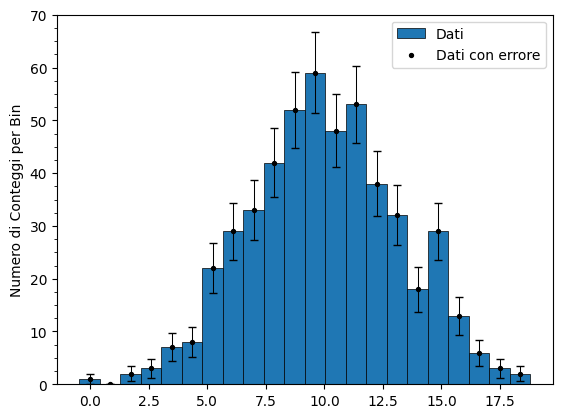

In [184]:
from matplotlib.ticker import MultipleLocator, FixedLocator

N = 500
std = 3
mean = 10

x = np.random.normal(loc=mean, scale=std, size=N)
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
ax.yaxis.set_major_locator(MultipleLocator(10.000))
ax.yaxis.set_minor_locator(MultipleLocator(2.5))

nbins = int(np.sqrt(N))
bins_size, edges, _ = plt.hist(x, bins=nbins, edgecolor='black', linewidth=0.5, label="Dati")

centers = [0.5 * (edges[k] + edges[k + 1]) for k in range(len(edges) - 1)]
plt.scatter(centers, bins_size, c="black", s=8, label="Dati con errore")
plt.errorbar(centers, bins_size, yerr=np.sqrt(bins_size), linestyle="None", c="black", capsize=3, linewidth=0.75)
plt.ylabel("Numero di Conteggi per Bin")
plt.legend();



437.8498287292326
499.940306678624


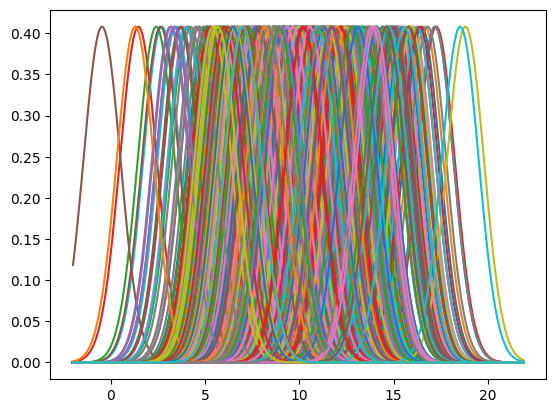

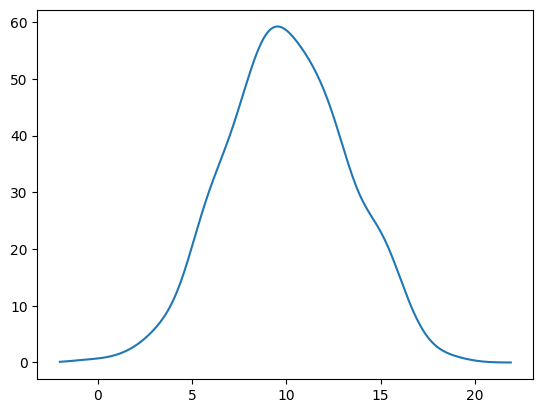

In [185]:
std0 = 1.06 * np.std(x) * np.power(len(x), -1/5)
all_range = np.arange(-2, 22, 0.1)

plt.figure()
all_gaussians = np.zeros(shape=(len(x), len(all_range)))
for i, v in enumerate(x):
    data = stats.norm.pdf(all_range,loc=v, scale=std0)
    all_gaussians[i, :] = data
    plt.plot(all_range, data)

original_norm = 0
for i, n in enumerate(bins_size):
    bin_size = edges[i + 1] - edges[i]
    original_norm += bin_size * n
print(original_norm)


# foo = np.array([[0, 1, 2], [0,1,2], [0,1,2]])
# print(foo)
# print(np.sum(foo, axis=0))


big_gaussian = np.sum(all_gaussians, axis=0)
plt.figure()
plt.plot(all_range, big_gaussian)
gaussian_norm = integrate.trapezoid(big_gaussian, x=all_range)
print(gaussian_norm)





# plt.figure()
# for data in all_gaussians:
#     

# print(data.shape, type(data))
# print(data)

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

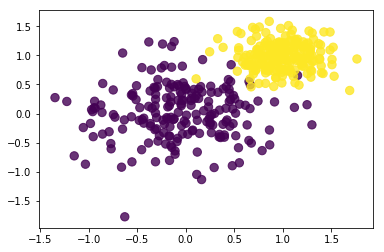

In [186]:
# ! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

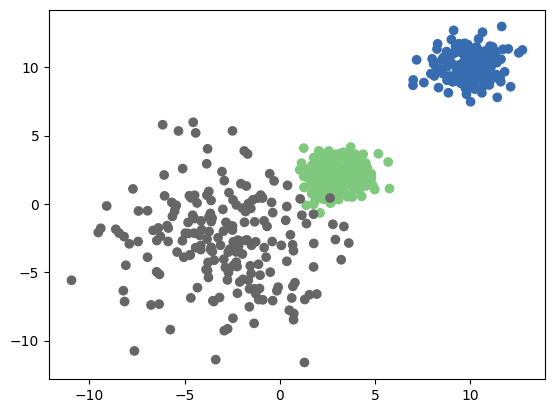

In [224]:
import numpy as np
import matplotlib.pyplot as plt


def generate_dataset(locs, scales):
    N = 200
    dataset = np.zeros(shape=(N * len(locs), 3))

    for k, (loc, scale) in enumerate(zip(locs, scales)):
        gaus1 = np.random.normal(loc=loc[0], scale=scale[0], size=N)
        gaus2 = np.random.normal(loc=loc[1], scale=scale[1], size=N)
        dataset[k * N: (k + 1) * N, 0] = gaus1
        dataset[k * N: (k + 1) * N, 1] = gaus2
        dataset[k * N: (k + 1) * N, 2] = np.ones(shape=N) * k
    
    return dataset


dataset = generate_dataset([(3, 2), (10, 10), (-3, -3)], [(1, 1), (1,1), (3, 3)])
# print(dataset)
plt.scatter(dataset[:, 0], dataset[:, 1], cmap="Accent", c=dataset[:, 2]);



3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [232]:
import pandas as pd

data = np.load("./residuals_261.npy", allow_pickle=True)
data = pd.DataFrame(data.item())

LinregressResult(slope=0.0032597701220305835, intercept=-0.15432816763069473, rvalue=0.043403510522559086, pvalue=8.717037183576464e-06, stderr=0.0007327014008445791, intercept_stderr=0.008458951961471837)


<ErrorbarContainer object of 3 artists>

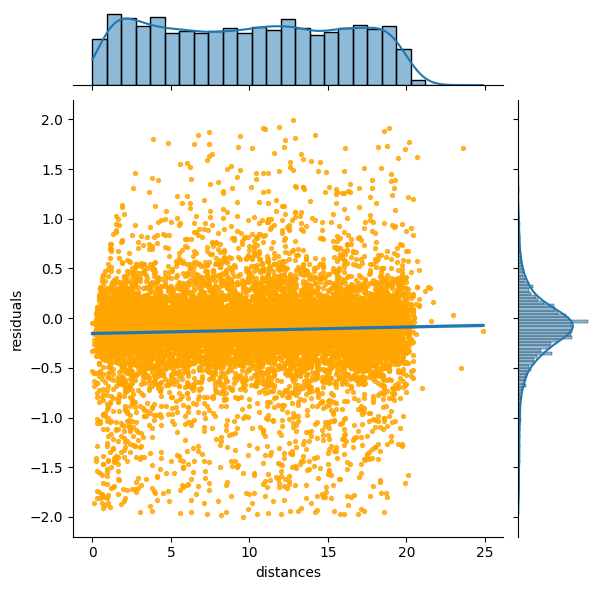

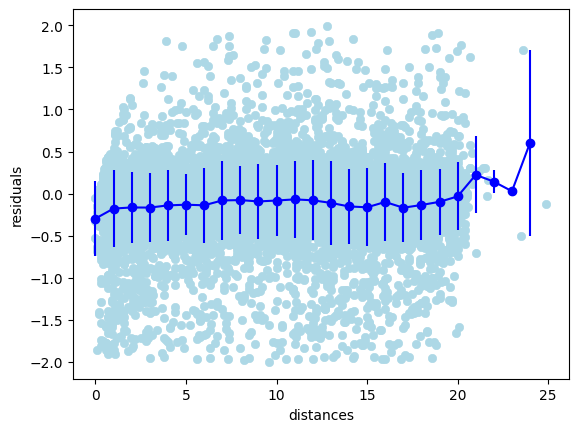

In [265]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

new_data = data[np.abs(data["residuals"]) < 2]

reg = stats.linregress(new_data["distances"], new_data["residuals"])
print(reg)

g = sns.jointplot(data=new_data, y="residuals", x="distances", kind="reg",scatter_kws={"color": "orange", "s": 8})

step = 1
x = np.arange(0, 25, step)
y = np.zeros(shape=len(x))
yerr = np.zeros(shape=len(x))
for i, value in enumerate(x):
    mask = ((value - step/2) <= new_data["distances"] ) & (new_data["distances"] < (value + step/2))
    y[i] = np.mean(new_data[mask]["residuals"])
    yerr[i] = np.std(new_data[mask]["residuals"])

# plt.figure()
# plt.scatter(x, y)
# plt.errorbar(x, y, yerr=yerr)


# g = sns.JointGrid()
# sns.scatterplot(data=new_data, x="residuals", y="distances", ec="b", fc="none", s=100, linewidth=1.5, ax=g.ax_joint)
# sns.histplot(x=x, fill=False, linewidth=2, ax=g.ax_marg_x)
# sns.histplot(y=y, linewidth=2, ax=g.ax_marg_y)

plt.figure()
g = sns.scatterplot(data=new_data, y="residuals", x="distances", color="lightblue", edgecolor=None)
plt.scatter(y=y, x=x, color="blue")
plt.errorbar(y=y, x=x, yerr=yerr, color="blue")

# y = np.array()